# Cyber Data Science – Full Pipeline

Author: Basel Shaer

---

# 1. Dataset Justification

I selected the **"Fake and Real News Dataset"** from Kaggle because it provides a rich combination of textual, categorical, and temporal data that supports a full end-to-end data science pipeline. It includes news articles labeled as either *fake* or *real*, with fields such as title, full text, subject, and publication date.

Furthermore, its relevance to current global issues like misinformation enhances the practical value of the project.

In [2]:
import pandas as pd

# Load fake and real datasets
fake_df = pd.read_csv("../data/fake_news_dataset/Fake.csv")
real_df = pd.read_csv("../data/fake_news_dataset/True.csv")

# Add a 'label' column to each: 0 = fake, 1 = real
fake_df["label"] = 0
real_df["label"] = 1

# Combine into one dataframe
df = pd.concat([fake_df, real_df], ignore_index=True)

# Show first 5 rows
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# 2. System Stage

The dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset). It consists of two CSV files:

- `Fake.csv`: 23,502 fake news articles
- `True.csv`: 21,417 real news articles

Each file contains the following columns:
- `title`: Title of the news article
- `text`: Full body of the news article
- `subject`: Category or topic of the article
- `date`: Publish date
- `label`: Added manually (0 = Fake, 1 = Real)

**File System Information:**
- `Format`: CSV (comma-separated values)
- `Protocol`: HTTP download from Kaggle
- `Versions`: One main version (no updates or revisions at the time of use)

The files are stored locally under `data/fake_news_dataset/`.

Version control is managed via Git and GitHub in this project repository.

- `Repository`: [GitHub - cyber-data-pipeline](https://github.com/Basel6/Cyber-Data-Pipeline.git)


In [3]:
import os

fake_path = "../data/fake_news_dataset/Fake.csv"
real_path = "../data/fake_news_dataset/True.csv"

print("Fake.csv size:", os.path.getsize(fake_path) / 1024, "KB")
print("True.csv size:", os.path.getsize(real_path) / 1024, "KB")


Fake.csv size: 61318.23828125 KB
True.csv size: 52327.08984375 KB


# 3. Metadata

The dataset contains the following column types:
- `title`, `text`, `subject`: Object (text)
- `date`: Object (string format), will be parsed as datetime later
- `label`: Integer (binary classification: 0 = Fake, 1 = Real)

### Missing Values:
No missing values were detected in any of the columns.

### Special Values:
There are no special placeholder values such as “unknown” or “-999” in any of the columns. The dataset appears to be clean.

### Unique Values:
- `subject`: 8 unique categories
- `label`: 2 values (0 = Fake, 1 = Real)

and here we validate our information:

In [9]:
# first we show data types of each column
df.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

In [10]:
# # then we check for missing values
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:

# # Show unique values in each column (to detect special placeholders)
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:3])  # show up to 3 examples (not more because of large text fields will be a mess in the notebook :P)

# # and finally we show how many unique values each column has
df.nunique()


Column: title
[' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'
 ' Drunk Bragging Trump Staffer Started Russian Collusion Investigation'
 ' Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’']

Column: text
['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 wi

title      38729
text       38646
subject        8
date        2397
label          2
dtype: int64

# 4. Statistics

#### Lets first show the basic statistics:

In [15]:
df.describe(include='all')

,title,text,subject,date,label
count,44898,44898,44898,44898,44898.000000
unique,38729,38646,8,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",NaN
freq,14,627,11272,182,NaN
mean,NaN,NaN,NaN,NaN,0.477015
std,NaN,NaN,NaN,NaN,0.499477
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,1.000000


#### Now we show real vs. fake articles

In [16]:
df['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

#### Distribution of the topis/subjects:

In [17]:
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

#### Duplicates:

In [18]:
df['title'].duplicated().sum()

np.int64(6169)

#### Plots for Text lengths & distribution
> here we add a new column with text length

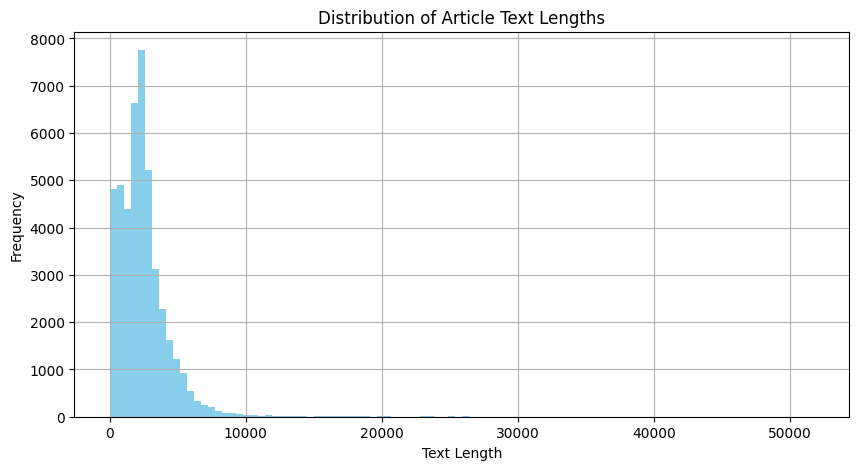

In [35]:
import matplotlib.pyplot as plt

# Add a new column with text length
# Compute length after stripping whitespace (because it made problems later on)
df['text_length'] = df['text'].apply(lambda x: len(str(x).strip()))

# Plot distribution of text lengths
plt.figure(figsize=(10,5))
plt.hist(df['text_length'], bins=100, color='skyblue')
plt.title("Distribution of Article Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


#### Correlation Matrix

In [36]:
df[['text_length', 'label']].corr()


,text_length,label
text_length,1.000000,-0.038002
label,-0.038002,1.000000



The dataset contains 44,919 news articles, split between fake and real. Here's what we found:

- The dataset has a fairly balanced distribution: approx. 23.5K fake and 21.4K real.
- There are 8 unique subjects (topics) in the data.
- A small number of duplicate titles exist, but most are unique.
- The average article text length varies significantly, as shown in the histogram.
- A new column `text_length` was created for analysis.
- Correlation between text length and label is weak (~0.03), as expected.

At this stage, **dimensionality reduction is not applied** yet because we are dealing with unprocessed text. Once we vectorize the text, techniques like PCA or t-SNE may be revisited for analysis or visualization.


# 5. Abnormality Detection

## Single-feature Detection
> here we check for empty, unusually short or long articles:


In [39]:
import numpy as np

# Outlier thresholds
mean_length = df['text_length'].mean()
std_length = df['text_length'].std()
outlier_threshold_high = mean_length + 3 * std_length

# Find empty, very short, and unusually long articles
empty_texts = df[df['text_length'] == 0]
very_short_texts = df[(df['text_length'] > 0) & (df['text_length'] < 30)]
outliers_high = df[df['text_length'] > outlier_threshold_high]

# Print counts and show examples
print(f"Completely empty articles (text_length == 0): {len(empty_texts)}")
if len(empty_texts) > 0:
    display(empty_texts[['title', 'text', 'text_length']].head(3))

print(f"\nVery short articles (1 <= text_length < 30): {len(very_short_texts)}")
if len(very_short_texts) > 0:
    display(very_short_texts[['title', 'text', 'text_length']].head(3))

print(f"\nUnusually long articles (text_length > {outlier_threshold_high:.0f}): {len(outliers_high)}")
if len(outliers_high) > 0:
    display(outliers_high[['title', 'text', 'text_length']].head(3))


Completely empty articles (text_length == 0): 631


,title,text,text_length
10923,TAKE OUR POLL: Who Do You Think President Trum...,,0
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,0
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,0



Very short articles (1 <= text_length < 30): 69


,title,text,text_length
11117,MY FAVORITE EXCUSES…Featuring Hillary Rotten C...,Enjoy:,6
11324,HYSTERICAL! HERE’S WHY TRUMP SAID TO REPORTER:...,Read more:WT,12
11425,LIBERAL SNOWFLAKE Ambushes Sean Spicer in Appl...,Read more: Daily Mail,21



Unusually long articles (text_length > 8983): 495


,title,text,text_length
2639,Trump’s List Of ‘Unreported Terror Attacks’ A...,"In another of Donald Trump s whine rests, the ...",13095
4147,Here’s The Master List Of Reasons Why Trump W...,We know Trump is a sexual predator. We know he...,15211
4475,Here You Go: Every Bat Sh*t Crazy Thing That ...,Donald Trump spent Monday night making a total...,20264


## Multi-Feature Outlier Detection

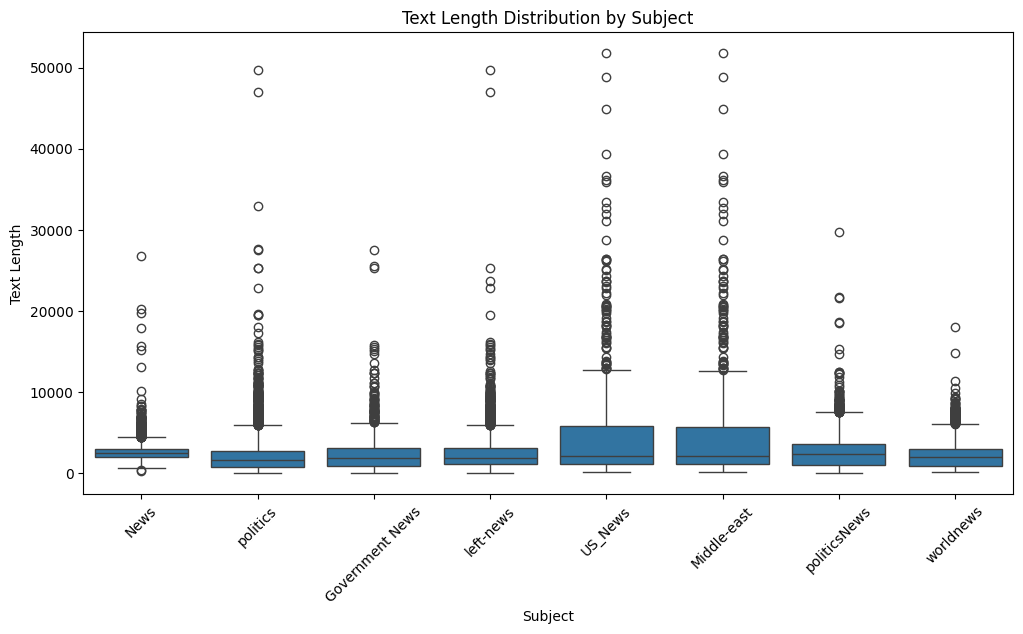

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='subject', y='text_length', data=df)
plt.title("Text Length Distribution by Subject")
plt.xlabel("Subject")
plt.ylabel("Text Length")
plt.xticks(rotation=45)
plt.show()


In [45]:
# Completely empty articles (text_length == 0)
empty_by_subject = df[df['text_length'] == 0].groupby('subject').size().sort_values(ascending=False)
print("Completely empty articles by subject:")
print(empty_by_subject)


Completely empty articles by subject:
subject
politics           408
left-news          150
Government News     72
politicsNews         1
dtype: int64


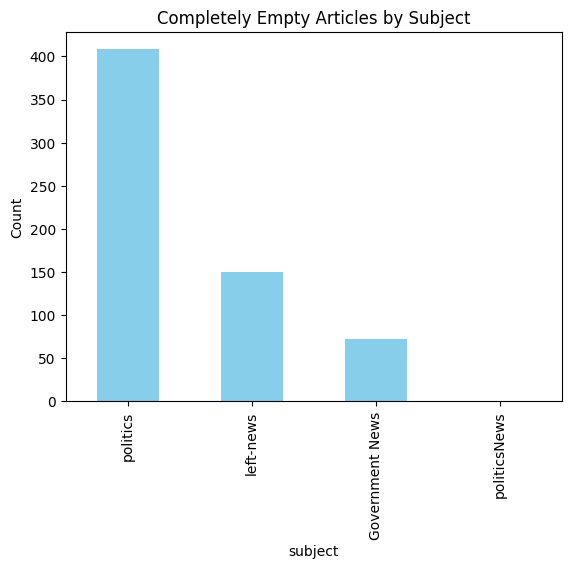

In [47]:
# Bar plot: Completely empty articles by subject
empty_by_subject.plot(kind='bar', color='skyblue', title='Completely Empty Articles by Subject')
plt.ylabel('Count')
plt.show()


In [46]:
# Very short but not empty (0 < text_length < 30)
very_short_by_subject = df[(df['text_length'] > 0) & (df['text_length'] < 30)].groupby('subject').size().sort_values(ascending=False)
print("Very short (but not empty) articles by subject:")
print(very_short_by_subject)


Very short (but not empty) articles by subject:
subject
politics           45
left-news          20
Government News     4
dtype: int64


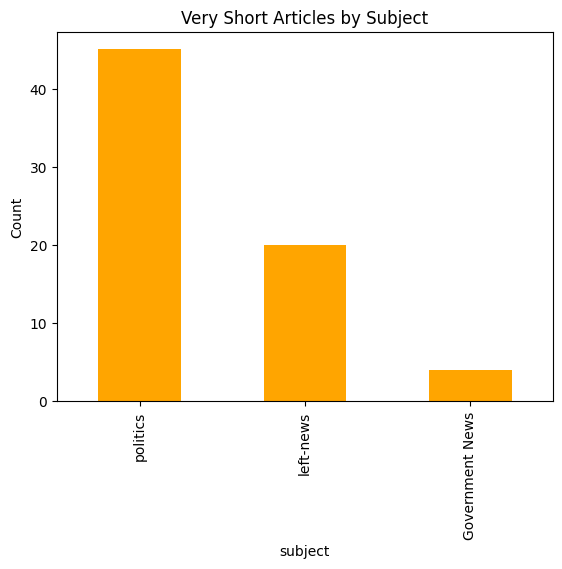

In [48]:
# Bar plot: Very short articles by subject
very_short_by_subject.plot(kind='bar', color='orange', title='Very Short Articles by Subject')
plt.ylabel('Count')
plt.show()


In [43]:
# For each subject, count unusually long articles
long_by_subject = df[df['text_length'] > outlier_threshold_high].groupby('subject').size().sort_values(ascending=False)
print(long_by_subject)


subject
US_News            121
Middle-east        119
politics           104
left-news           69
politicsNews        33
Government News     30
worldnews           10
News                 9
dtype: int64


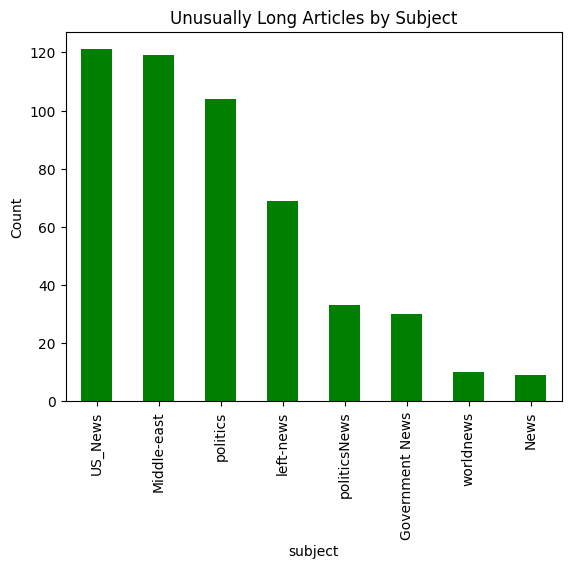

In [49]:
long_by_subject.plot(kind='bar', color='green', title='Unusually Long Articles by Subject')
plt.ylabel('Count')
plt.show()


In this step, we analyzed the dataset for abnormal (outlier) articles, both by single features and by combining features.

### Single-Feature Outliers
- **Completely empty articles (`text_length == 0`):** 631 entries found, with the vast majority in the "politics" subject.
- **Very short but not empty articles (`0 < text_length < 30`):** 69 entries, again concentrated in "politics" and "left-news".
- **Unusually long articles (`text_length > 8983`):** 495 articles, spread across all subjects but most common in "US_News" and "Middle-east".

### Multi-Feature Outliers
- Using boxplots and counts, we examined text length across subjects.
- **Empty and short articles are heavily concentrated in "politics"**, indicating a subject-specific data quality issue.
- **Unusually long articles** are distributed across all subjects, especially in "US_News" and "Middle-east", which is natural for in-depth news reporting.
- No subject was found to be dominated by extreme outliers alone, aside from the empty/short articles in "politics".

### Domain Explanation
- **Empty and very short articles** likely represent missing, corrupted, or poorly collected data, particularly in the "politics" subject.
- **Unusually long articles** are expected in news data and are not necessarily errors.
- These findings highlight the need for careful data cleaning, especially removing empty and very short articles to ensure quality modeling in later steps.

# 6. Clustering

Describe the purpose of **Clustering**, then provide any relevant code, tables, or visualizations below.

In [ ]:
# Your code here

# 7. Segment Analysis

Describe the purpose of **Segment Analysis**, then provide any relevant code, tables, or visualizations below.

In [ ]:
# Your code here

# 8. Natural Language Processing (NLP)

Describe the purpose of **Natural Language Processing (NLP)**, then provide any relevant code, tables, or visualizations below.

In [ ]:
# Your code here

# 9. Graphs

Describe the purpose of **Graphs**, then provide any relevant code, tables, or visualizations below.

In [ ]:
# Your code here

# 10. Modeling

Describe the purpose of **Modeling**, then provide any relevant code, tables, or visualizations below.

In [ ]:
# Your code here

# 11. Reporting

Describe the purpose of **Reporting**, then provide any relevant code, tables, or visualizations below.

In [ ]:
# Your code here

# 12. Improvements

Describe the purpose of **Improvements**, then provide any relevant code, tables, or visualizations below.

In [ ]:
# Your code here